In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
# Set pandas to display all rows
pd.set_option('display.max_rows', None)
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [2]:
df = pd.read_excel('/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx')

In [3]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(522064, 7)

In [5]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

# Data Preprocessing

In [6]:
df.dropna(subset=['Itemname'],inplace=True)

In [7]:
df.shape

(520609, 7)

In [8]:
df.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132586
Country            0
dtype: int64

In [9]:
df.duplicated().sum()

5286

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(515323, 7)

In [13]:
df.describe()

,Quantity,Date,Price,CustomerID
count,515323.000000,515323,515323.000000,382811.000000
mean,10.218348,2011-07-04 11:11:17.317022720,3.852350,15310.347702
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:14:00,1.250000,13928.500000
50%,3.000000,2011-07-19 15:55:00,2.080000,15249.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,16820.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.625366,NaN,42.172409,1722.483516


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515323 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      515323 non-null  object        
 1   Itemname    515323 non-null  object        
 2   Quantity    515323 non-null  int64         
 3   Date        515323 non-null  datetime64[ns]
 4   Price       515323 non-null  float64       
 5   CustomerID  382811 non-null  float64       
 6   Country     515323 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.5+ MB


In [15]:
df.shape

(515323, 7)

In [16]:
df.apply(pd.Series.nunique)

BillNo        20208
Itemname       4185
Quantity        628
Date          18670
Price          1285
CustomerID     4297
Country          30
dtype: int64

# Data Visualisation (EDA)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515323 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      515323 non-null  object        
 1   Itemname    515323 non-null  object        
 2   Quantity    515323 non-null  int64         
 3   Date        515323 non-null  datetime64[ns]
 4   Price       515323 non-null  float64       
 5   CustomerID  382811 non-null  float64       
 6   Country     515323 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.5+ MB


In [18]:
df.describe()

,Quantity,Date,Price,CustomerID
count,515323.000000,515323,515323.000000,382811.000000
mean,10.218348,2011-07-04 11:11:17.317022720,3.852350,15310.347702
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:14:00,1.250000,13928.500000
50%,3.000000,2011-07-19 15:55:00,2.080000,15249.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,16820.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.625366,NaN,42.172409,1722.483516


In [19]:
product_counts = df["Itemname"].value_counts()

In [20]:
product_counts.head(20)

Itemname
WHITE HANGING HEART T-LIGHT HOLDER    2257
JUMBO BAG RED RETROSPOT               2084
REGENCY CAKESTAND 3 TIER              1921
PARTY BUNTING                         1670
LUNCH BAG RED RETROSPOT               1558
ASSORTED COLOUR BIRD ORNAMENT         1452
SET OF 3 CAKE TINS PANTRY DESIGN      1353
PACK OF 72 RETROSPOT CAKE CASES       1310
LUNCH BAG  BLACK SKULL.               1288
NATURAL SLATE HEART CHALKBOARD        1238
JUMBO BAG PINK POLKADOT               1225
HEART OF WICKER SMALL                 1199
JUMBO STORAGE BAG SUKI                1188
JUMBO SHOPPER VINTAGE RED PAISLEY     1171
PAPER CHAIN KIT 50'S CHRISTMAS        1167
LUNCH BAG SPACEBOY DESIGN             1154
LUNCH BAG CARS BLUE                   1144
SPOTTY BUNTING                        1129
JAM MAKING SET PRINTED                1118
WOODEN PICTURE FRAME WHITE FINISH     1098
Name: count, dtype: int64

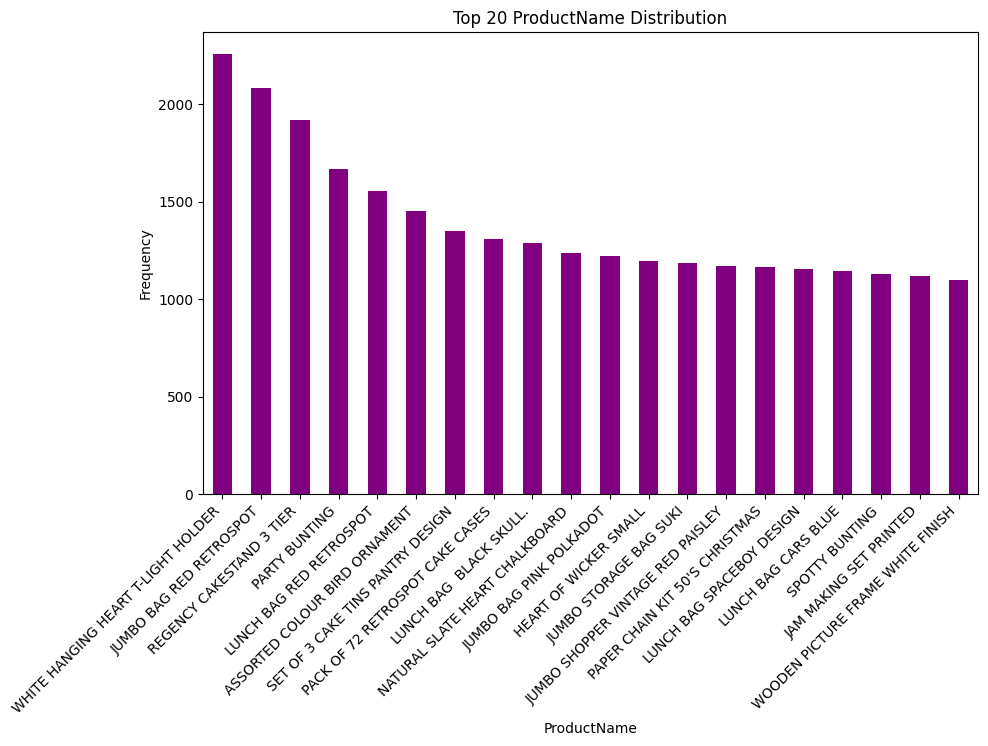

In [21]:
import matplotlib.pyplot as plt

product_counts.head(20).plot(kind='bar', figsize=(10, 6), color="purple")
plt.title('Top 20 ProductName Distribution')
plt.xlabel('ProductName')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
df.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

# Perform One-Hot Encoding to separate each itemname into binary format

In [23]:
# Preprocessing the data
data_processed = df[['BillNo', 'Itemname']]
data_encoded = pd.get_dummies(data_processed, columns=['Itemname'])
data_encoded.columns = data_encoded.columns.str.replace("Itemname_", "")
basket = data_encoded.groupby('BillNo').sum()

In [24]:
pd.set_option('display.max_columns', None)
basket.head(10)

*Boombox Ipod Classic  *USB Office Mirror Ball  \
BillNo                                                   
536365                      0                        0   
536366                      0                        0   
536367                      0                        0   
536368                      0                        0   
536369                      0                        0   
536370                      0                        0   
536371                      0                        0   
536372                      0                        0   
536373                      0                        0   
536374                      0                        0   

        10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                       
536365                       0                           0   
536366                       0                           0   
536367                       0                           0   
536368                       0                           0   
536369                       0                           0   
536370                       0                           0   
536371                       0                           0   
536372                       0                           0   
536373                       0                           0   
536374                       0                           0   

        12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
BillNo                                                         
536365                          0                          0   
536366                          0                          0   
536367                          0                          0   
536368                          0                          0   
536369                          0                          0   
536370                          0                          0   
536371                          0                          0   
536372                          0                          0   
536373                          0                          0   
536374                          0                          0   

        12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
BillNo                                                                   
536365                             0                                 0   
536366                             0                                 0   
536367                             0                                 0   
536368                             0                                 0   
536369                             0                                 0   
536370                             0                                 0   
536371                             0                                 0   
536372                             0                                 0   
536373                             0                                 0   
536374                             0                                 0   

        12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
BillNo                                                                   
536365                                0                              0   
536366                                0                              0   
536367                                0                              0   
536368                                0                              0   
536369                                0                              0   
536370                                0                              0   
536371                                0                              0   
536372                                0                              0   
536373                                0                              0   
536374                                0                              0   

        12 PENCILS 

# Perform Market Basket Analysis

Key Concepts in Market Basket Analysis:
* Itemsets: A collection of one or more items. For example, {bread, milk} is an itemset.

* Support: It's a measure of how frequently an itemset appears in the data. Mathematically, it is calculated as:

**Support= 
Number of transactions containing the itemset / Total number of transactions**

* Confidence: Confidence is a measure of how often items in Y appear in transactions that contain X. It is used to evaluate the accuracy of a rule. Mathematically:

**Confidence
(𝑋→𝑌)=
Support
(𝑋∪𝑌)
Support
(𝑋)
Confidence(X→Y)= 
Support(X)
Support(X∪Y)**

 
This tells us how likely Y is purchased when X is purchased.

* Lift: Lift measures the strength of an association rule over the random co-occurrence of X and Y. A lift greater than 1 indicates a positive association, meaning the presence of X increases the likelihood of Y. Mathematically:

Lift
(
𝑋
→
𝑌
)
=
Confidence
(
𝑋
→
𝑌
)
Support
(
𝑌
)
Lift(X→Y)= 
Support(Y)
Confidence(X→Y)
​


In [25]:
# Convert the DataFrame to boolean values (True/False)
basket_bool = basket > 0

What It Does: Converts the DataFrame values to boolean (True/False), where True indicates the presence of an item in a transaction and False indicates its absence. This transformation is necessary because the apriori algorithm requires binary input to identify frequent itemsets.

In [26]:
# Now, run the apriori algorithm
frequent_itemsets = apriori(basket_bool, min_support=0.02, use_colnames=True)

What It Does: Applies the apriori algorithm to the boolean DataFrame basket_bool to generate frequent itemsets that meet the minimum support threshold of 0.02 (i.e., itemsets that appear in at least 2% of transactions). The use_colnames=True parameter ensures that the item names are preserved in the output, which makes interpretation easier. 

In [27]:
frequent_itemsets.head()

,support,itemsets
0,0.022615,(3 STRIPEY MICE FELTCRAFT)
1,0.022961,(4 TRADITIONAL SPINNING TOPS)
2,0.046615,(6 RIBBONS RUSTIC CHARM)
3,0.020635,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.029691,(60 CAKE CASES VINTAGE CHRISTMAS)


In [28]:
# Generate association rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

What It Does: Generates association rules from the frequent itemsets where the confidence level is at least 0.5. This means that the rules generated will have a confidence of at least 50%, indicating that the consequent (Y) is present in at least 50% of the transactions where the antecedent (X) is present.

# Lift Analysis

In [29]:
# Perform lift analysis by sorting rules by lift and filtering by a minimum lift threshold
lift_threshold = 1.0  # You can adjust this threshold
lift_analysis = rules[rules['lift'] > lift_threshold].sort_values(by='lift', ascending=False)

What It Does: Filters and sorts the association rules based on the lift metric. Only rules with a lift greater than 1 are retained, as these indicate a positive association between the items. The rules are then sorted in descending order of lift, so the strongest associations appear first.

In [30]:
lift_analysis.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.036174,0.036421,0.025485,0.704514,19.343514,0.024167,3.261000,0.983894
51,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.036421,0.036174,0.025485,0.699728,19.343514,0.024167,3.209847,0.984147
47,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028207,0.048248,0.025485,0.903509,18.726262,0.024124,9.863609,0.974074
52,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.048248,0.028207,0.025485,0.528205,18.726262,0.024124,2.059779,0.994586
17,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048248,0.036421,0.029939,0.620513,17.037124,0.028181,2.539160,0.989023


In [31]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.039489,0.063292,0.021526,0.545113,8.612697,0.019027,2.059210,0.920232
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.037559,0.047852,0.020338,0.541502,11.316103,0.018541,2.076667,0.947207
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.050821,0.047852,0.031324,0.616358,12.880423,0.028892,2.481867,0.971748
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047852,0.050821,0.031324,0.654602,12.880423,0.028892,2.748071,0.968718
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.037559,0.050821,0.022466,0.598155,11.769743,0.020558,2.362054,0.950746


# Summary > Interpreting the result

* **antecedent support:** The proportion of transactions in which the antecedent appears. For the first rule, 0.039489 means that 60 TEATIME FAIRY CAKE CASES appears in approximately 3.95% of transactions.

* **consequent support:** The proportion of transactions in which the consequent appears. For the first rule, 0.063292 means that PACK OF 72 RETROSPOT CAKE CASES appears in approximately 6.33% of transactions.

* **support:** The proportion of transactions that contain both the antecedent and consequent. For the first rule, 0.021526 means that both items appear together in approximately 2.15% of transactions.

* **confidence:** The probability of the consequent given the antecedent. For the first rule, 0.545113 indicates that when 60 TEATIME FAIRY CAKE CASES is purchased, PACK OF 72 RETROSPOT CAKE CASES is purchased in approximately 54.5% of those transactions.

* **lift:** Measures the strength of the association between antecedent and consequent. For the first rule, 8.612697 means that the likelihood of purchasing PACK OF 72 RETROSPOT CAKE CASES given 60 TEATIME FAIRY CAKE CASES is 8.61 times greater than if the items were purchased independently. A lift greater than 1 indicates a positive relationship.

* **leverage:** Shows the difference between the observed support and the expected support if the items were independent. For the first rule, 0.019027 indicates a positive association, as the value is greater than 0.

* **conviction:** Measures how likely the rule is to be true given the absence of the antecedent. For the first rule, 2.059210 suggests that the likelihood of PACK OF 72 RETROSPOT CAKE CASES being purchased given the absence of 60 TEATIME FAIRY CAKE CASES is about 2.06 times more likely than if the items were independent.

* **zhangs_metric:** Another metric for evaluating the strength of association rules. This metric is less commonly used but can provide additional insights.